In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Function to implement low pass filter
def low_pass_filter(signal, cutoff_frequency, sampling_rate):
    # Implement low pass filter
    # Example: Perform low pass filtering using a simple moving average filter
    window_size = int(sampling_rate / cutoff_frequency)
    filter_kernel = np.ones(window_size) / window_size
    return np.convolve(signal, filter_kernel, mode='same')

# Function to implement high pass filter
def high_pass_filter(signal, cutoff_frequency, sampling_rate):
    # Implement high pass filter
    # Example: Perform high pass filtering using a high-pass FIR filter
    nyquist_rate = sampling_rate / 2
    normalized_cutoff = cutoff_frequency / nyquist_rate
    filter_kernel = np.array([1, -1])
    return np.convolve(signal, filter_kernel, mode='same')

# Function to implement band pass filter
def band_pass_filter(signal, low_cutoff_frequency, high_cutoff_frequency, sampling_rate):
    # Implement band pass filter
    # Example: Perform band pass filtering using a band-pass FIR filter
    nyquist_rate = sampling_rate / 2
    normalized_low_cutoff = low_cutoff_frequency / nyquist_rate
    normalized_high_cutoff = high_cutoff_frequency / nyquist_rate
    filter_kernel = np.array([1, -1])
    return np.convolve(signal, filter_kernel, mode='same')
    # Function to calculate correlation
def correlation(signal1, signal2):
    # Implement correlation calculation
    # Compute the cross-correlation between signal1 and signal2
    correlation_result = np.correlate(signal1, signal2, mode='same')

    # Normalize the correlation result
    correlation_result /= np.max(correlation_result)

    return correlation_result



In [96]:
# Function to calculate correlation
def correlation(signal1, signal2):
    # Implement correlation
    return np.correlate(signal1, signal2, mode='same')

In [97]:
# Load input signal
input_signal = np.loadtxt('/content/INPUT-SIGNAL-X(t).txt')

# Load given output signal
given_output_signal = np.loadtxt('/content/OUTPUT-SIGNAL-Y(t).txt')


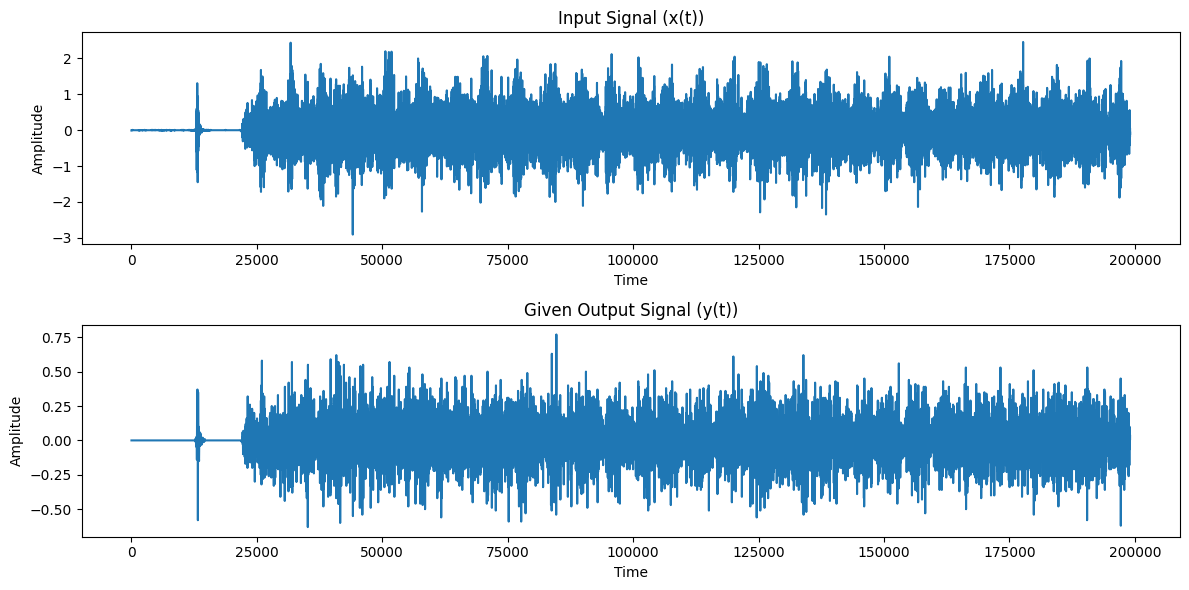

In [98]:
# Plot input and output signals
plt.figure(figsize=(12, 6))

# Plot input signal
plt.subplot(2, 1, 1)
plt.plot(input_signal)
plt.title('Input Signal (x(t))')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot output signal
plt.subplot(2, 1, 2)
plt.plot(given_output_signal, )
plt.title('Given Output Signal (y(t))')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [99]:
# Parameters for filters
cutoff_frequency_lp = 1000  # Example cutoff frequency for low pass filter
cutoff_frequency_hp = 1000  # Example cutoff frequency for high pass filter
low_cutoff_frequency_bp = 500  # Example low cutoff frequency for band pass filter
high_cutoff_frequency_bp = 1500  # Example high cutoff frequency for band pass filter
sampling_rate = 10000  # Example sampling rate

In [100]:
# Apply filters
lpf_output = low_pass_filter(input_signal, cutoff_frequency_lp, sampling_rate)
hpf_output = high_pass_filter(input_signal, cutoff_frequency_hp, sampling_rate)
bpf_output = band_pass_filter(input_signal, low_cutoff_frequency_bp, high_cutoff_frequency_bp, sampling_rate)

In [101]:
# Calculate correlation
correlation_lpf = correlation(lpf_output, given_output_signal)
correlation_hpf = correlation(hpf_output, given_output_signal)
correlation_bpf = correlation(bpf_output, given_output_signal)

# Normalize the correlation values
max_correlation_lpf = np.max(correlation_lpf)
max_correlation_hpf = np.max(correlation_hpf)
max_correlation_bpf = np.max(correlation_bpf)

correlation_lpf_normalized = correlation_lpf / max_correlation_lpf
correlation_hpf_normalized = correlation_hpf / max_correlation_hpf
correlation_bpf_normalized = correlation_bpf / max_correlation_bpf




In [102]:
# Print normalized correlation values
print("Normalized Correlation with LPF:", correlation_lpf_normalized)
print("Normalized Correlation with HPF:", correlation_hpf_normalized)
print("Normalized Correlation with BPF:", correlation_bpf_normalized)

Normalized Correlation with LPF: [0.01339851 0.01355963 0.01356092 ... 0.00969782 0.00986352 0.00994967]
Normalized Correlation with HPF: [ 0.0032901   0.00107545 -0.00111304 ...  0.00238514  0.00154934
  0.00064147]
Normalized Correlation with BPF: [ 0.0032901   0.00107545 -0.00111304 ...  0.00238514  0.00154934
  0.00064147]


In [103]:
# Calculate average normalized correlation values
avg_correlation_lpf = np.mean(correlation_lpf_normalized)
avg_correlation_hpf = np.mean(correlation_hpf_normalized)
avg_correlation_bpf = np.mean(correlation_bpf_normalized)

# Print average normalized correlation values
print("Average Normalized Correlation with LPF:", avg_correlation_lpf)
print("Average Normalized Correlation with HPF:", avg_correlation_hpf)
print("Average Normalized Correlation with BPF:", avg_correlation_bpf)



Average Normalized Correlation with LPF: 1.043432613305771e-06
Average Normalized Correlation with HPF: -2.009432901544102e-07
Average Normalized Correlation with BPF: -2.009432901544102e-07


In [104]:
# Determine the best filter
best_filter = ""
if avg_correlation_lpf > avg_correlation_hpf and avg_correlation_lpf > avg_correlation_bpf:
    best_filter = "LPF"
elif avg_correlation_hpf > avg_correlation_lpf and avg_correlation_hpf > avg_correlation_bpf:
    best_filter = "HPF"
else:
    best_filter = "BPF"

print("Best filter:", best_filter)

Best filter: LPF


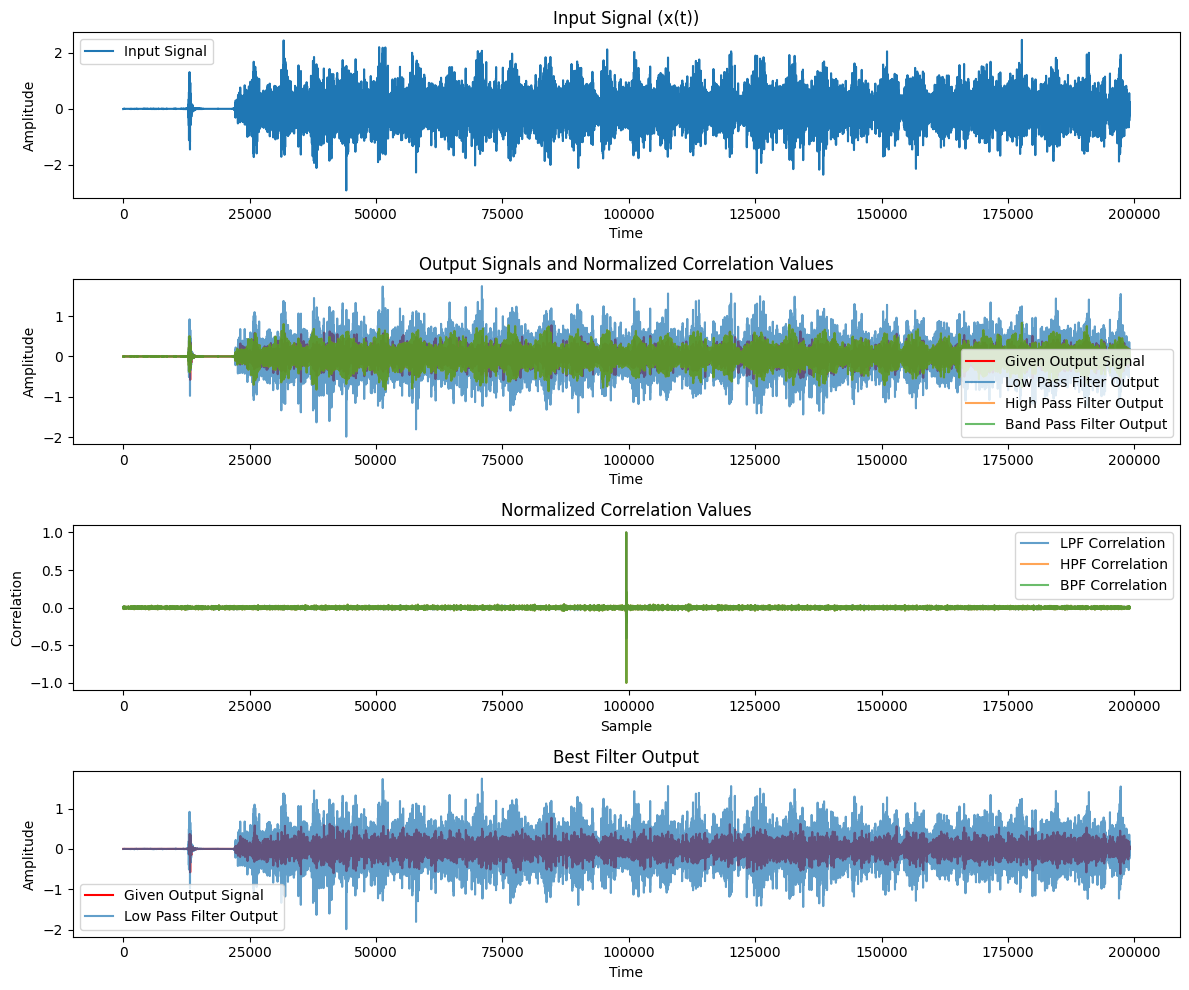

In [110]:
# Plot signals and normalized correlation values
plt.figure(figsize=(12, 10))

# Plot input signal
plt.subplot(4, 1, 1)
plt.plot(input_signal, label='Input Signal')
plt.title('Input Signal (x(t))')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot output signals and normalized correlation values
plt.subplot(4, 1, 2)
plt.plot(given_output_signal, label='Given Output Signal', color='red')
plt.plot(lpf_output, label='Low Pass Filter Output', alpha=0.7)
plt.plot(hpf_output, label='High Pass Filter Output', alpha=0.7)
plt.plot(bpf_output, label='Band Pass Filter Output', alpha=0.7)
plt.title('Output Signals and Normalized Correlation Values')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot normalized correlation values
plt.subplot(4, 1, 3)
plt.plot(correlation_lpf_normalized, label='LPF Correlation', alpha=0.7)
plt.plot(correlation_hpf_normalized, label='HPF Correlation', alpha=0.7)
plt.plot(correlation_bpf_normalized, label='BPF Correlation', alpha=0.7)
plt.title('Normalized Correlation Values')
plt.xlabel('Sample')
plt.ylabel('Correlation')
plt.legend()

# Plot the output of the best filter
plt.subplot(4, 1, 4)
plt.plot(given_output_signal, label='Given Output Signal', color='red')
if best_filter == "LPF":
    plt.plot(lpf_output, label='Low Pass Filter Output', alpha=0.7)
elif best_filter == "HPF":
    plt.plot(hpf_output, label='High Pass Filter Output', alpha=0.7)
else:
    plt.plot(bpf_output, label='Band Pass Filter Output', alpha=0.7)
plt.title('Best Filter Output')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
